# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Description 

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills**
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

## Evaluation

**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric**

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Submission File Format**

See `sample_submission.csv`

## Data

### File descriptions

- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Number of bedrooms above basement level
- KitchenAbvGr: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Environment Setup

In [74]:
# Data and Stats packages
import numpy as np
import pandas as pd

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic settings
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Wrangling

### Loading Data

In [101]:
train_data_path = 'data/train.csv'
test_data_path = 'data/test.csv'

train_data = pd.read_csv(train_data_path, index_col=0)
test_data = pd.read_csv(test_data_path, index_col=0)

### Quickly Inspect Data

In [15]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
column_defs_dict = {
    "MSSubClass": "The building class",
    "MSZoning": "The general zoning classification",
    "LotFrontage": "Linear feet of street connected to property",
    "LotArea": "Lot size in square feet",
    "Street": "Type of road access",
    "Alley": "Type of alley access",
    "LotShape": "General shape of property",
    "LandContour": "Flatness of the property",
    "Utilities": "Type of utilities available",
    "LotConfig": "Lot configuration",
    "LandSlope": "Slope of property",
    "Neighborhood": "Physical locations within Ames city limits",
    "Condition1": "Proximity to main road or railroad",
    "Condition2": "Proximity to main road or railroad (if a second is present)",
    "BldgType": "Type of dwelling",
    "HouseStyle": "Style of dwelling",
    "OverallQual": "Overall material and finish quality",
    "OverallCond": "Overall condition rating",
    "YearBuilt": "Original construction date",
    "YearRemodAdd": "Remodel date",
    "RoofStyle": "Type of roof",
    "RoofMatl": "Roof material",
    "Exterior1st": "Exterior covering on house",
    "Exterior2nd": "Exterior covering on house (if more than one material)",
    "MasVnrType": "Masonry veneer type",
    "MasVnrArea": "Masonry veneer area in square feet",
    "ExterQual": "Exterior material quality",
    "ExterCond": "Present condition of the material on the exterior",
    "Foundation": "Type of foundation",
    "BsmtQual": "Height of the basement",
    "BsmtCond": "General condition of the basement",
    "BsmtExposure": "Walkout or garden level basement walls",
    "BsmtFinType1": "Quality of basement finished area",
    "BsmtFinSF1": "Type 1 finished square feet",
    "BsmtFinType2": "Quality of second finished area (if present)",
    "BsmtFinSF2": "Type 2 finished square feet",
    "BsmtUnfSF": "Unfinished square feet of basement area",
    "TotalBsmtSF": "Total square feet of basement area",
    "Heating": "Type of heating",
    "HeatingQC": "Heating quality and condition",
    "CentralAir": "Central air conditioning",
    "Electrical": "Electrical system",
    "1stFlrSF": "First Floor square feet",
    "2ndFlrSF": "Second floor square feet",
    "LowQualFinSF": "Low quality finished square feet (all floors)",
    "GrLivArea": "Above grade (ground) living area square feet",
    "BsmtFullBath": "Basement full bathrooms",
    "BsmtHalfBath": "Basement half bathrooms",
    "FullBath": "Full bathrooms above grade",
    "HalfBath": "Half baths above grade",
    "BedroomAbvGr": "Number of bedrooms above basement level",
    "KitchenAbvGr": "Number of kitchens",
    "KitchenQual": "Kitchen quality",
    "TotRmsAbvGrd": "Total rooms above grade (does not include bathrooms)",
    "Functional": "Home functionality rating",
    "Fireplaces": "Number of fireplaces",
    "FireplaceQu": "Fireplace quality",
    "GarageType": "Garage location",
    "GarageYrBlt": "Year garage was built",
    "GarageFinish": "Interior finish of the garage",
    "GarageCars": "Size of garage in car capacity",
    "GarageArea": "Size of garage in square feet",
    "GarageQual": "Garage quality",
    "GarageCond": "Garage condition",
    "PavedDrive": "Paved driveway",
    "WoodDeckSF": "Wood deck area in square feet",
    "OpenPorchSF": "Open porch area in square feet",
    "EnclosedPorch": "Enclosed porch area in square feet",
    "3SsnPorch": "Three season porch area in square feet",
    "ScreenPorch": "Screen porch area in square feet",
    "PoolArea": "Pool area in square feet",
    "PoolQC": "Pool quality",
    "Fence": "Fence quality",
    "MiscFeature": "Miscellaneous feature not covered in other categories",
    "MiscVal": "$Value of miscellaneous feature",
    "MoSold": "Month Sold",
    "YrSold": "Year Sold",
    "SaleType": "Type of sale",
    "SaleCondition": "Condition of sale",
    "SalePrice": "the property's sale price in dollars. This is the target variable that you're trying to predict."
}

In [5]:
for column_name, dtype in zip(train_data.columns, train_data.dtypes):
    print(f"{column_name: <15}: {dtype}, {column_defs_dict[column_name]}")

MSSubClass     : int64, The building class
MSZoning       : object, The general zoning classification
LotFrontage    : float64, Linear feet of street connected to property
LotArea        : int64, Lot size in square feet
Street         : object, Type of road access
Alley          : object, Type of alley access
LotShape       : object, General shape of property
LandContour    : object, Flatness of the property
Utilities      : object, Type of utilities available
LotConfig      : object, Lot configuration
LandSlope      : object, Slope of property
Neighborhood   : object, Physical locations within Ames city limits
Condition1     : object, Proximity to main road or railroad
Condition2     : object, Proximity to main road or railroad (if a second is present)
BldgType       : object, Type of dwelling
HouseStyle     : object, Style of dwelling
OverallQual    : int64, Overall material and finish quality
OverallCond    : int64, Overall condition rating
YearBuilt      : int64, Original construct

### Inspect null values

In [102]:
null_columns_dict = {
    column_name: {
        "null_count": null_count,
        "dtype": dtype,
        "def": column_defs_dict[column_name]
    }
    for (column_name, null_count, dtype) in zip(
        train_data.columns, 
        train_data.isna().sum(), 
        train_data.dtypes
    ) 
    if null_count > 0
}

null_columns_dict

{'LotFrontage': {'null_count': 259,
  'dtype': dtype('float64'),
  'def': 'Linear feet of street connected to property'},
 'Alley': {'null_count': 1369,
  'dtype': dtype('O'),
  'def': 'Type of alley access'},
 'MasVnrType': {'null_count': 8,
  'dtype': dtype('O'),
  'def': 'Masonry veneer type'},
 'MasVnrArea': {'null_count': 8,
  'dtype': dtype('float64'),
  'def': 'Masonry veneer area in square feet'},
 'BsmtQual': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'Height of the basement'},
 'BsmtCond': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'General condition of the basement'},
 'BsmtExposure': {'null_count': 38,
  'dtype': dtype('O'),
  'def': 'Walkout or garden level basement walls'},
 'BsmtFinType1': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'Quality of basement finished area'},
 'BsmtFinType2': {'null_count': 38,
  'dtype': dtype('O'),
  'def': 'Quality of second finished area (if present)'},
 'Electrical': {'null_count': 1,
  'dtype': dtype('O'),
  'def':

### Discard columns that have too many null values(total rows: 1460): 
- Alley: 1369
- FireplaceQu: 690
- PoolQC: 1453
- Fence: 1179
- MiscFeature: 1406

In [103]:
dropped_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
train_data_new = train_data.drop(columns=dropped_columns)
test_data_new = test_data.drop(columns=dropped_columns)

assert len(train_data_new.columns) == len(train_data.columns) - len(dropped_columns)
assert len(test_data_new.columns) == len(test_data.columns) - len(dropped_columns)

### Imputation

In [104]:
# update null_columns_dict
for dropped_column in dropped_columns:
    del null_columns_dict[dropped_column]
    
null_columns_dict

{'LotFrontage': {'null_count': 259,
  'dtype': dtype('float64'),
  'def': 'Linear feet of street connected to property'},
 'MasVnrType': {'null_count': 8,
  'dtype': dtype('O'),
  'def': 'Masonry veneer type'},
 'MasVnrArea': {'null_count': 8,
  'dtype': dtype('float64'),
  'def': 'Masonry veneer area in square feet'},
 'BsmtQual': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'Height of the basement'},
 'BsmtCond': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'General condition of the basement'},
 'BsmtExposure': {'null_count': 38,
  'dtype': dtype('O'),
  'def': 'Walkout or garden level basement walls'},
 'BsmtFinType1': {'null_count': 37,
  'dtype': dtype('O'),
  'def': 'Quality of basement finished area'},
 'BsmtFinType2': {'null_count': 38,
  'dtype': dtype('O'),
  'def': 'Quality of second finished area (if present)'},
 'Electrical': {'null_count': 1,
  'dtype': dtype('O'),
  'def': 'Electrical system'},
 'GarageType': {'null_count': 81,
  'dtype': dtype('O'),
  'def':

**fill `LotFrontage`**

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

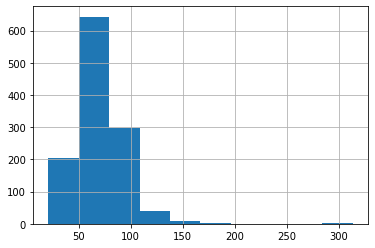

In [79]:
train_data_new['LotFrontage'].value_counts()
train_data_new['LotFrontage'].hist()

In [82]:
most_frequent_value = train_data_new['LotFrontage'].value_counts().index[0]
train_data_new['LotFrontage'] = train_data_new['LotFrontage'].fillna(most_frequent_value)

assert sum(train_data_new['LotFrontage'].isna()) == 0

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
22.0       1
136.0      1
149.0      1
31.0       1
131.0      1
Name: LotFrontage, Length: 115, dtype: int64

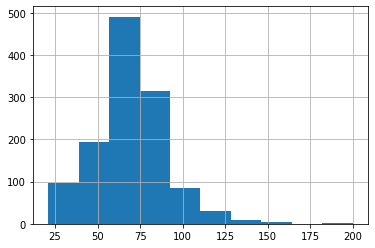

In [83]:
test_data_new['LotFrontage'].value_counts()
test_data_new['LotFrontage'].hist()

In [84]:
most_frequent_value = test_data_new['LotFrontage'].value_counts().index[0]
test_data_new['LotFrontage'] = test_data_new['LotFrontage'].fillna(most_frequent_value)

assert sum(test_data_new['LotFrontage'].isna()) == 0

**fill `MasVnrType`**

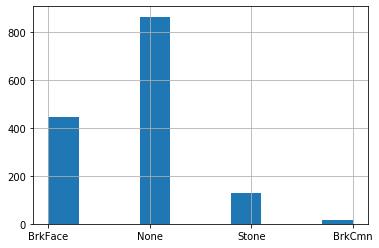

In [105]:
train_data_new['MasVnrType'].hist();

In [109]:
most_frequent_value = train_data_new['MasVnrType'].value_counts().index[0]
assert most_frequent_value == 'None', 'It should be None'
train_data_new['MasVnrType'] = train_data_new['MasVnrType'].fillna(most_frequent_value)

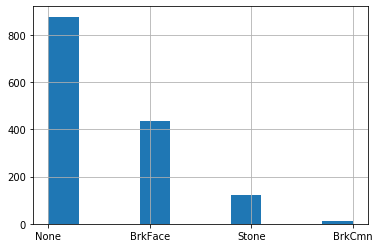

In [99]:
test_data_new['MasVnrType'].hist();